In [1]:
import pandas as pd
import numpy as np

In [2]:
x = pd.read_csv("../data_processed.csv").to_numpy()

In [3]:
from KMeans import KMeans
kmeans = KMeans(x)

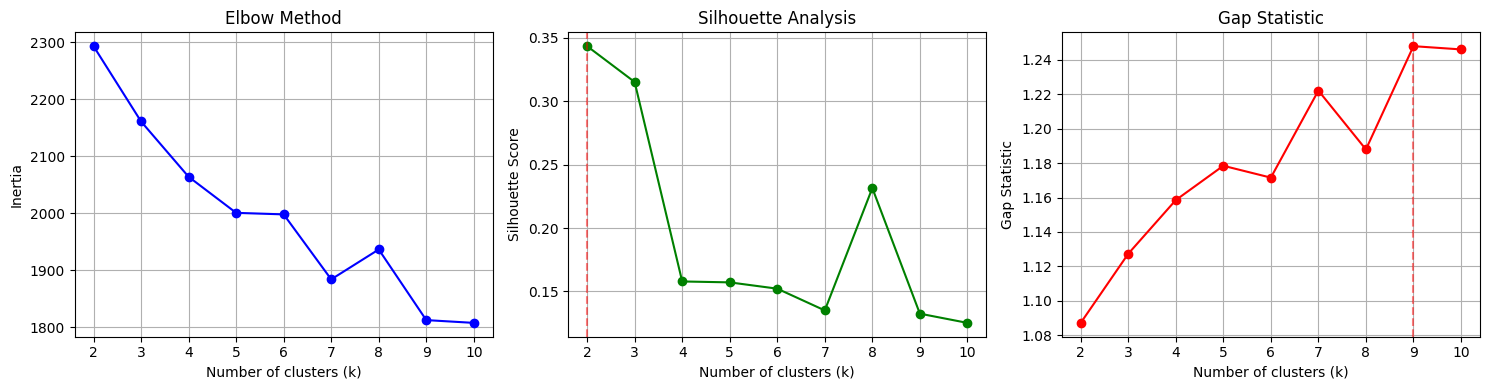

Best k by Silhouette Score: 2 (score: 0.3434)
Best k by Gap Statistic: 9 (gap: 1.2479)
Check the Elbow plot for visual inflection point


{'k_values': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'inertias': [np.float64(2292.757854976681),
  np.float64(2160.6446325680213),
  np.float64(2063.639848886388),
  np.float64(2000.4199422260635),
  np.float64(1997.7019204369508),
  np.float64(1883.7437691254295),
  np.float64(1936.1845612114394),
  np.float64(1812.2922783423023),
  np.float64(1807.4016044989976)],
 'silhouette_scores': [np.float64(0.3433822406907781),
  np.float64(0.3151352252818164),
  np.float64(0.15791204949866966),
  np.float64(0.157189681181565),
  np.float64(0.1522195413210072),
  np.float64(0.13507301162777208),
  np.float64(0.2315158954252743),
  np.float64(0.13252382770004525),
  np.float64(0.12525089459851552)],
 'gap_stats': [np.float64(1.0872160960541954),
  np.float64(1.127345805909587),
  np.float64(1.1585117394829174),
  np.float64(1.1784473419739614),
  np.float64(1.1715555736931407),
  np.float64(1.222094507641331),
  np.float64(1.1879302390856843),
  np.float64(1.2478923466609082),
  np.float64(1.24600842557

In [4]:
kmeans.find_best_k()

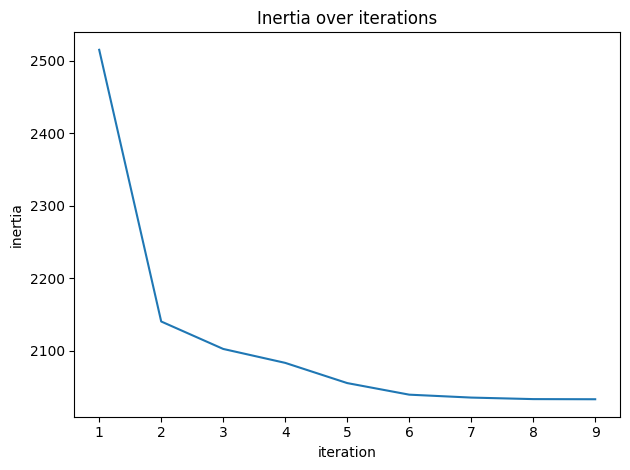

(array([2, 1, 2, 4, 2, 4, 1, 4, 4, 4, 1, 1, 2, 1, 4, 4, 1, 4, 2, 0, 0, 0,
        4, 1, 2, 2, 4, 1, 4, 1, 2, 4, 4, 2, 4, 1, 1, 0, 0, 1, 0, 4, 2, 1,
        1, 2, 0, 4, 0, 0, 0, 0, 0, 1, 1, 0, 2, 4, 0, 0, 0, 0, 4, 3, 4, 1,
        0, 0, 3, 0, 1, 3, 4, 1, 0, 1, 0, 2, 2, 0, 0, 4, 2, 2, 0, 1, 1, 1,
        0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 4, 0, 0, 2, 0,
        0, 3, 3, 3, 0, 0, 3, 4, 4, 1, 0, 1, 2, 0, 0, 0, 1, 1, 1, 2, 0, 1,
        1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 3, 4, 3, 1, 0, 0, 3, 3, 0,
        0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 4, 0, 0, 0,
        3, 1, 0, 0, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 4, 0, 0, 4, 4, 0, 4, 1,
        1, 1, 0, 1, 2, 4, 0, 1, 0, 1, 4, 0, 2, 0, 2, 3, 4, 4, 3, 0, 2, 1,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 4, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0,
        3, 0, 1, 0, 0, 3, 0, 0, 2, 0, 2, 1, 1, 1, 2, 4, 2, 4, 1, 1, 1, 0,
        1, 2, 0, 0, 0, 3, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0,
        3, 0, 3, 0, 3, 1, 0, 0, 0, 0, 

In [5]:
kmeans.fit(5, plot_inertia=True)

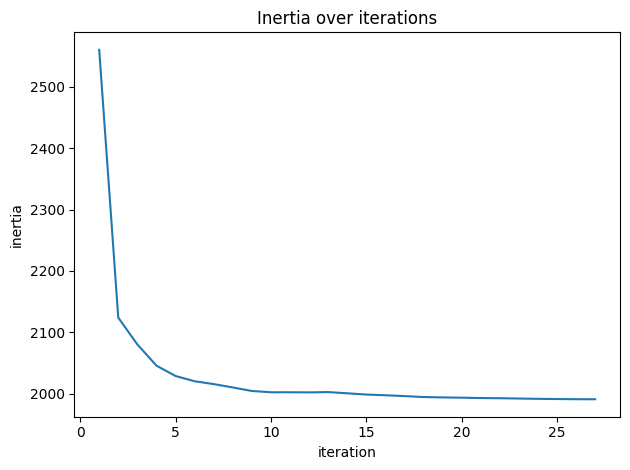

(array([2, 1, 1, 3, 1, 3, 1, 3, 3, 3, 0, 1, 2, 1, 3, 3, 1, 3, 1, 0, 0, 4,
        3, 1, 1, 2, 3, 1, 3, 1, 2, 3, 1, 1, 3, 1, 3, 0, 0, 3, 0, 4, 2, 3,
        0, 1, 4, 3, 0, 0, 0, 0, 0, 1, 0, 4, 1, 3, 0, 4, 4, 4, 3, 4, 3, 3,
        4, 0, 3, 0, 1, 3, 3, 0, 0, 1, 4, 2, 2, 0, 4, 3, 2, 1, 0, 1, 4, 1,
        4, 3, 0, 0, 0, 0, 1, 1, 4, 4, 0, 4, 0, 4, 0, 4, 4, 3, 4, 0, 2, 4,
        4, 4, 3, 4, 4, 0, 4, 3, 3, 1, 0, 1, 2, 0, 0, 0, 0, 1, 3, 1, 4, 1,
        1, 0, 1, 0, 4, 0, 1, 4, 0, 1, 4, 0, 0, 4, 3, 4, 0, 0, 4, 3, 3, 0,
        4, 0, 1, 0, 0, 0, 4, 1, 1, 4, 1, 0, 0, 1, 1, 0, 0, 0, 3, 4, 0, 4,
        3, 3, 0, 0, 2, 2, 1, 0, 0, 4, 1, 0, 4, 0, 3, 4, 4, 3, 3, 0, 3, 1,
        1, 3, 4, 1, 2, 3, 4, 0, 4, 1, 3, 0, 1, 0, 2, 3, 3, 3, 4, 4, 1, 1,
        0, 0, 4, 1, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 4, 0, 2, 1, 0, 1, 0, 0,
        3, 0, 1, 4, 0, 3, 4, 0, 2, 0, 2, 1, 1, 4, 2, 3, 2, 3, 1, 0, 1, 0,
        1, 2, 4, 0, 0, 4, 0, 0, 2, 4, 1, 4, 0, 1, 0, 0, 1, 4, 1, 3, 0, 0,
        4, 0, 4, 4, 3, 0, 4, 0, 0, 0, 

In [6]:
kmeans.fit(5, smart_initialization=False, plot_inertia=True)